In [0]:
import os
import zipfile
import numpy as np
import pandas as pd
import seaborn as sns
from google.colab import drive
import matplotlib.pyplot as plt

In [3]:
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
path = "gdrive/My Drive/DrivenData/Data/"

In [0]:
traindf = pd.read_csv(os.path.join(path,"train_values.csv"))

In [6]:
traindf.head()

,row_id,process_id,object_id,phase,timestamp,pipeline,supply_flow,supply_pressure,return_temperature,return_conductivity,...,tank_temperature_pre_rinse,tank_temperature_caustic,tank_temperature_acid,tank_concentration_caustic,tank_concentration_acid,tank_lsh_caustic,tank_lsh_acid,tank_lsh_clean_water,tank_lsh_pre_rinse,target_time_period
0,0,20001,405,pre_rinse,2018-04-15 04:20:47,L4,8550.348,0.615451,18.044704,4.990765,...,32.385708,83.036750,73.03241,45.394646,44.340126,False,0.0,False,0.0,False
1,1,20001,405,pre_rinse,2018-04-15 04:20:49,L4,11364.294,0.654297,18.229168,3.749680,...,32.385708,83.015045,73.03241,45.394447,44.339380,False,0.0,False,0.0,False
2,2,20001,405,pre_rinse,2018-04-15 04:20:51,L4,12174.479,0.699870,18.395544,2.783954,...,32.385708,83.015045,73.03241,45.396280,44.336735,False,0.0,False,0.0,False
3,3,20001,405,pre_rinse,2018-04-15 04:20:53,L4,13436.776,0.761502,18.583622,1.769353,...,32.385708,83.036750,73.03241,45.401875,44.333110,False,0.0,False,0.0,False
4,4,20001,405,pre_rinse,2018-04-15 04:20:55,L4,13776.766,0.837240,18.627026,0.904020,...,32.385708,83.015045,73.03241,45.398197,44.334373,False,0.0,False,0.0,False


In [7]:
traindf.columns

Index(['row_id', 'process_id', 'object_id', 'phase', 'timestamp', 'pipeline',
       'supply_flow', 'supply_pressure', 'return_temperature',
       'return_conductivity', 'return_turbidity', 'return_flow', 'supply_pump',
       'supply_pre_rinse', 'supply_caustic', 'return_caustic', 'supply_acid',
       'return_acid', 'supply_clean_water', 'return_recovery_water',
       'return_drain', 'object_low_level', 'tank_level_pre_rinse',
       'tank_level_caustic', 'tank_level_acid', 'tank_level_clean_water',
       'tank_temperature_pre_rinse', 'tank_temperature_caustic',
       'tank_temperature_acid', 'tank_concentration_caustic',
       'tank_concentration_acid', 'tank_lsh_caustic', 'tank_lsh_acid',
       'tank_lsh_clean_water', 'tank_lsh_pre_rinse', 'target_time_period'],
      dtype='object')

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


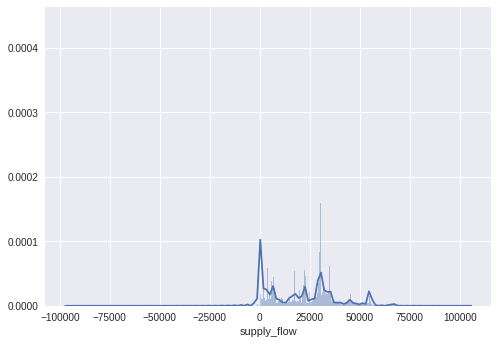

In [0]:
c = 'supply_flow'
sns.distplot(traindf[c], bins=500, hist=True, kde=True, rug=False)

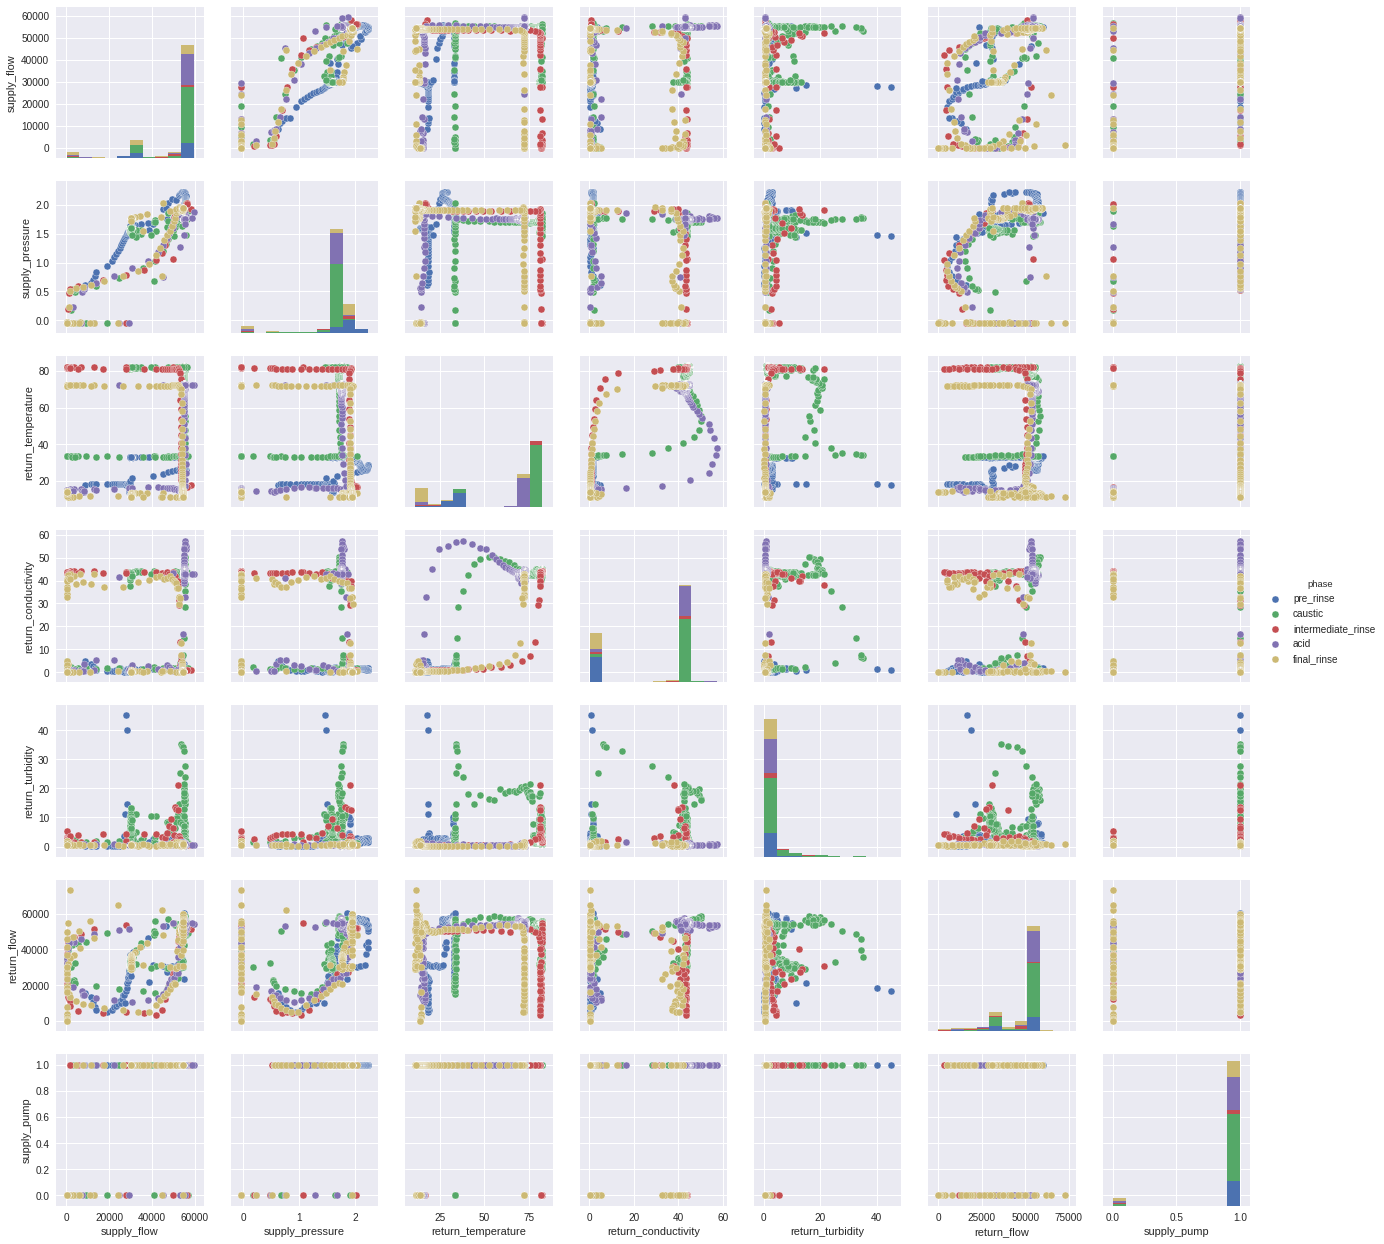

In [0]:
sns.pairplot(data=traindf.iloc[:1632,[3]+[6,7,8,9,10,11,12]], hue="phase")

In [0]:
feat = ['supply_flow', 'supply_pressure', 'return_temperature',
       'return_conductivity', 'return_turbidity', 'return_flow', 'supply_pump',
       'supply_pre_rinse', 'supply_caustic', 'return_caustic', 'supply_acid',
       'return_acid', 'supply_clean_water', 'return_recovery_water',
       'return_drain', 'object_low_level', 'tank_level_pre_rinse',
       'tank_level_caustic', 'tank_level_acid', 'tank_level_clean_water',
       'tank_temperature_pre_rinse', 'tank_temperature_caustic',
       'tank_temperature_acid', 'tank_concentration_caustic',
       'tank_concentration_acid', 'tank_lsh_caustic', 'tank_lsh_acid',
       'tank_lsh_clean_water', 'tank_lsh_pre_rinse', 'target_time_period']

In [0]:
p = traindf.iloc[:1632]

In [13]:
p['phase'].unique()

array(['pre_rinse', 'caustic', 'intermediate_rinse', 'acid',
       'final_rinse'], dtype=object)

In [12]:
p[p['phase']=='pre_rinse'].index[0]

,row_id,process_id,object_id,phase,timestamp,pipeline,supply_flow,supply_pressure,return_temperature,return_conductivity,...,tank_temperature_pre_rinse,tank_temperature_caustic,tank_temperature_acid,tank_concentration_caustic,tank_concentration_acid,tank_lsh_caustic,tank_lsh_acid,tank_lsh_clean_water,tank_lsh_pre_rinse,target_time_period
0,0,20001,405,pre_rinse,2018-04-15 04:20:47,L4,8550.348,0.615451,18.044704,4.990765,...,32.385708,83.036750,73.032410,45.394646,44.340126,False,0.0,False,0.0,False
1,1,20001,405,pre_rinse,2018-04-15 04:20:49,L4,11364.294,0.654297,18.229168,3.749680,...,32.385708,83.015045,73.032410,45.394447,44.339380,False,0.0,False,0.0,False
2,2,20001,405,pre_rinse,2018-04-15 04:20:51,L4,12174.479,0.699870,18.395544,2.783954,...,32.385708,83.015045,73.032410,45.396280,44.336735,False,0.0,False,0.0,False
3,3,20001,405,pre_rinse,2018-04-15 04:20:53,L4,13436.776,0.761502,18.583622,1.769353,...,32.385708,83.036750,73.032410,45.401875,44.333110,False,0.0,False,0.0,False
4,4,20001,405,pre_rinse,2018-04-15 04:20:55,L4,13776.766,0.837240,18.627026,0.904020,...,32.385708,83.015045,73.032410,45.398197,44.334373,False,0.0,False,0.0,False
5,5,20001,405,pre_rinse,2018-04-15 04:20:57,L4,18710.215,0.944444,18.583622,0.509684,...,32.385708,82.993350,73.032410,45.385914,44.336000,False,0.0,False,0.0,False
6,6,20001,405,pre_rinse,2018-04-15 04:20:59,L4,21216.725,1.032118,18.460648,0.443773,...,32.385708,82.993350,73.032410,45.369984,44.332523,False,0.0,False,0.0,False
7,7,20001,405,pre_rinse,2018-04-15 04:21:01,L4,22403.066,1.087891,18.420862,0.521089,...,32.367622,82.953560,73.032410,45.381107,44.336490,False,0.0,False,0.0,False
8,8,20001,405,pre_rinse,2018-04-15 04:21:03,L4,23278.357,1.140842,18.420862,0.779835,...,32.367622,82.953560,73.032410,45.402290,44.334263,False,0.0,False,0.0,False
9,9,20001,405,pre_rinse,2018-04-15 04:21:05,L4,24178.965,1.191623,18.377459,1.552591,...,32.367622,82.953560,73.032410,45.405660,44.334488,False,0.0,False,0.0,False


---------------------------------------------------
supply_flow


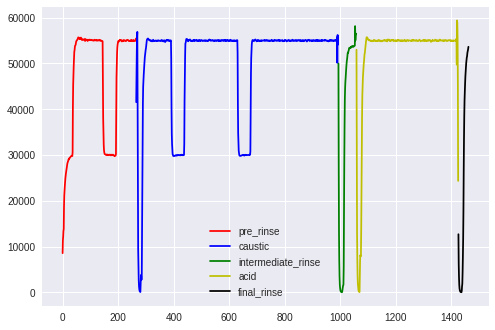

---------------------------------------------------
supply_pressure


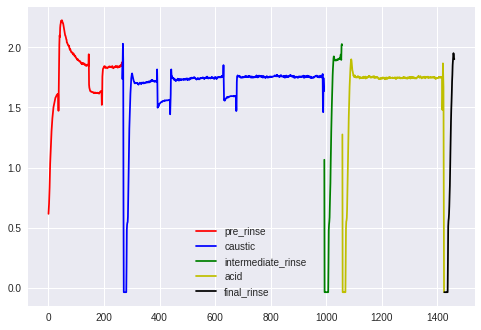

---------------------------------------------------
return_temperature


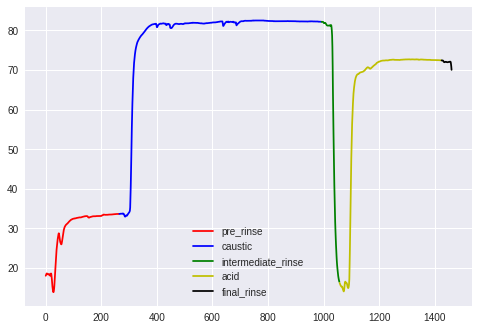

---------------------------------------------------
return_conductivity


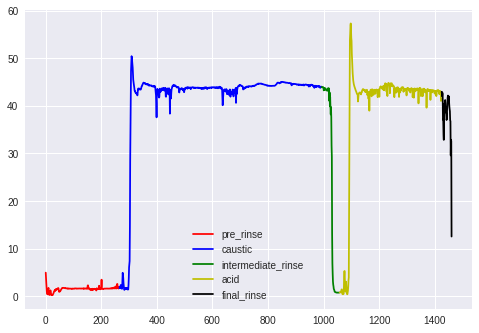

---------------------------------------------------
return_turbidity


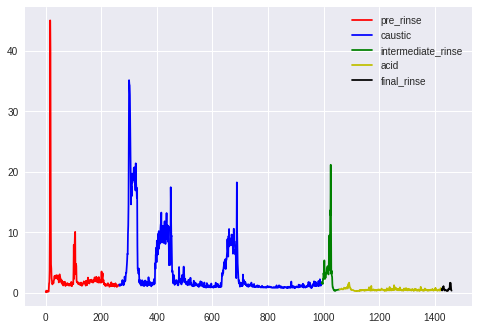

---------------------------------------------------
return_flow


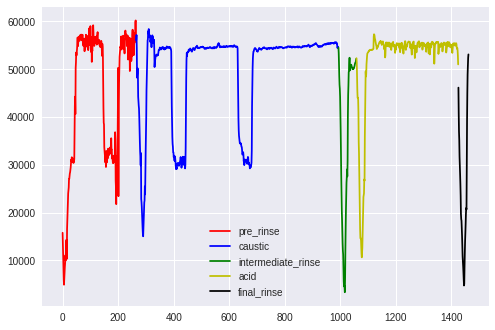

---------------------------------------------------
supply_pump


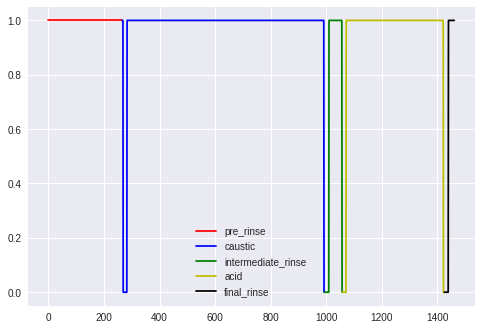

---------------------------------------------------
supply_pre_rinse


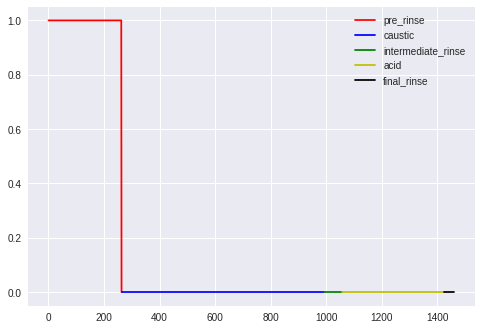

---------------------------------------------------
supply_caustic


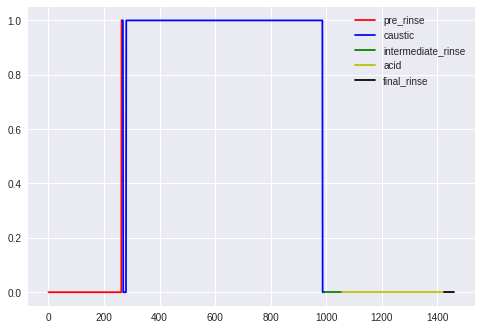

---------------------------------------------------
return_caustic


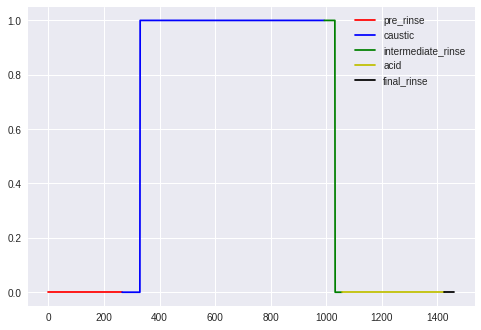

---------------------------------------------------
supply_acid


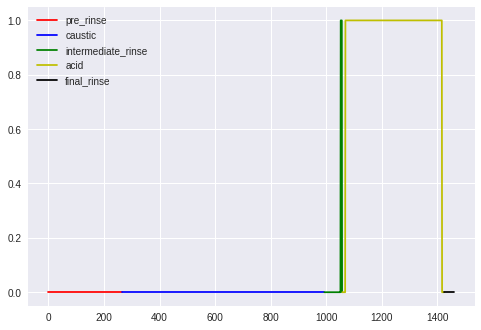

---------------------------------------------------
return_acid


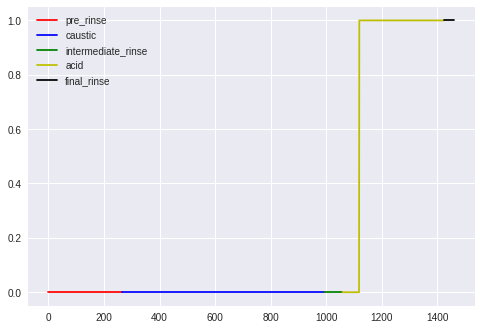

---------------------------------------------------
supply_clean_water


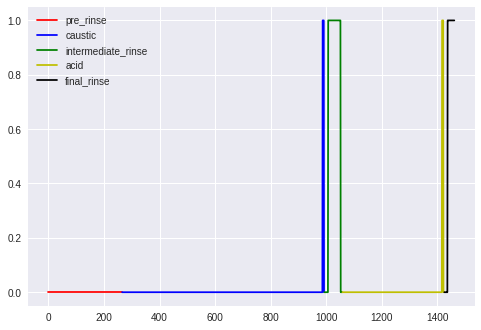

---------------------------------------------------
return_recovery_water


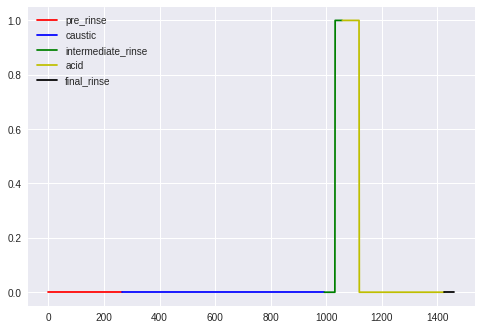

---------------------------------------------------
return_drain


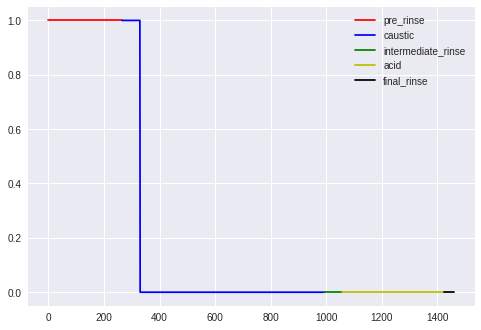

---------------------------------------------------
object_low_level


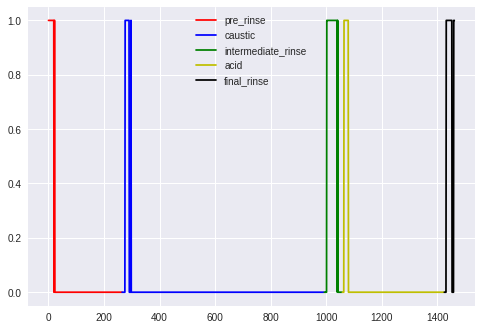

---------------------------------------------------
tank_level_pre_rinse


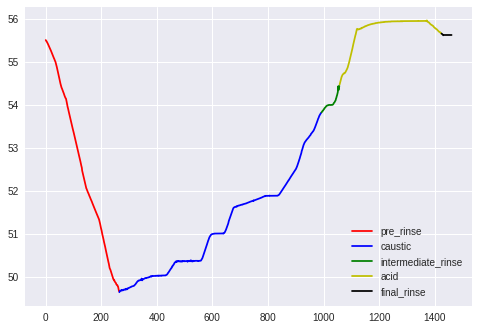

---------------------------------------------------
tank_level_caustic


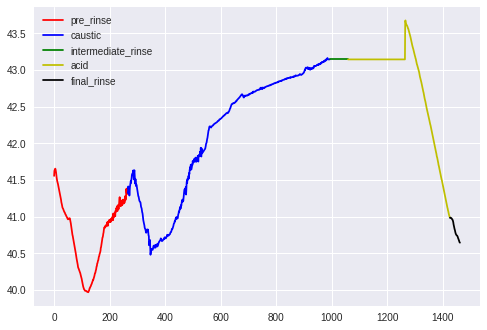

---------------------------------------------------
tank_level_acid


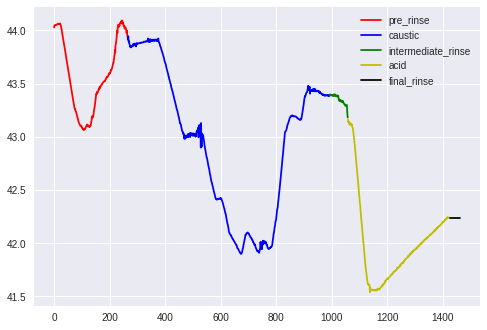

---------------------------------------------------
tank_level_clean_water


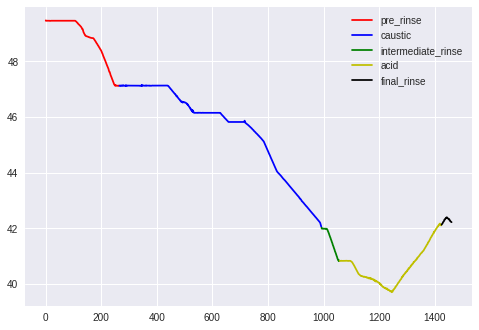

---------------------------------------------------
tank_temperature_pre_rinse


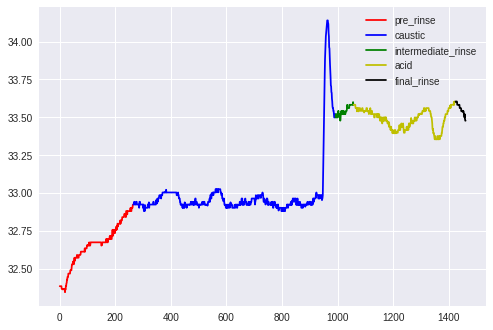

---------------------------------------------------
tank_temperature_caustic


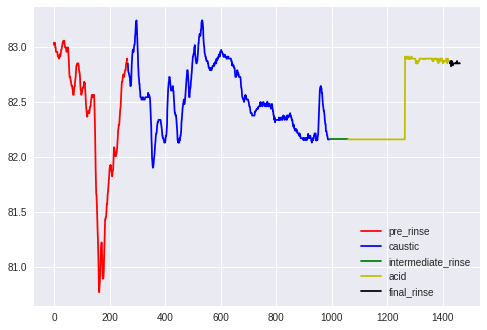

---------------------------------------------------
tank_temperature_acid


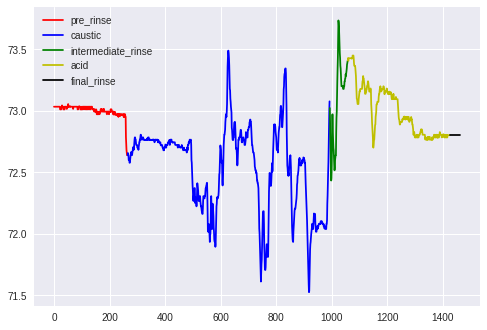

---------------------------------------------------
tank_concentration_caustic


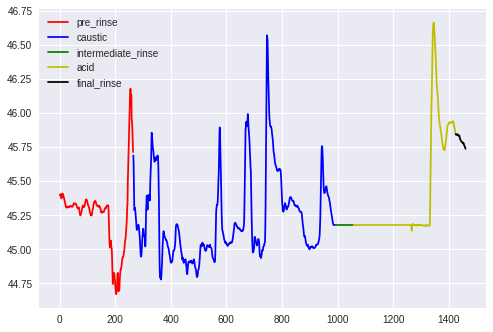

---------------------------------------------------
tank_concentration_acid


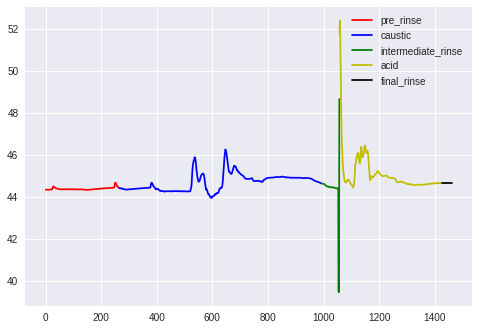

---------------------------------------------------
tank_lsh_caustic


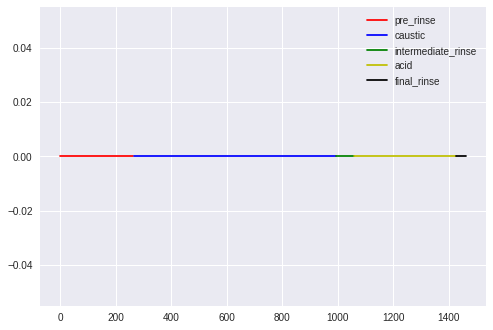

---------------------------------------------------
tank_lsh_acid


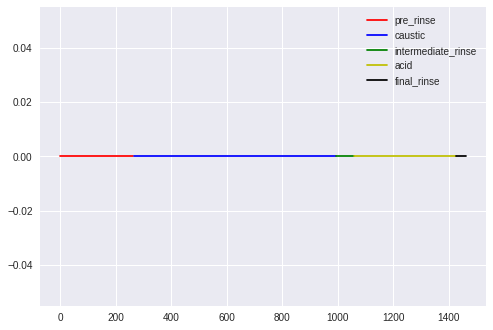

---------------------------------------------------
tank_lsh_clean_water


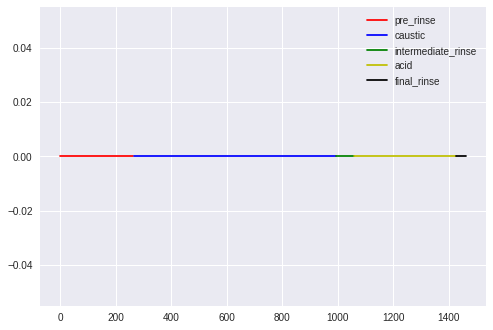

---------------------------------------------------
tank_lsh_pre_rinse


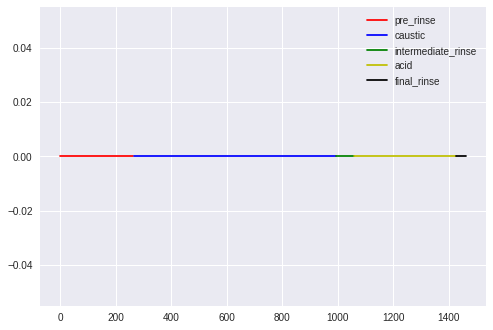

---------------------------------------------------
target_time_period


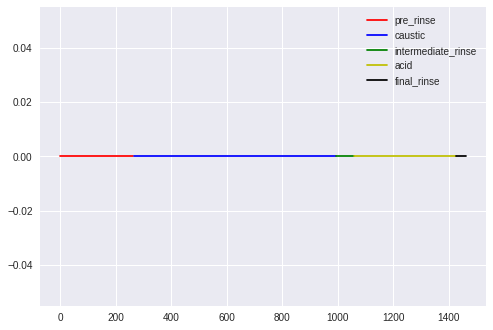

In [24]:
t = traindf[(traindf['process_id']==20001)&(traindf['target_time_period']==False)]
for c in feat:
    print("---------------------------------------------------")
    print(c)
    phases = ['pre_rinse', 'caustic', 'intermediate_rinse', 'acid', 'final_rinse']
    col = ['r','b','g','y','black']
    for i,p in enumerate(phases):
        try:
            start = t[t['phase']==p].index[0]
            end = t[t['phase']==p].index[-1]
            d = t.loc[start:end,c]
            plt.plot(d,color=col[i],label=p)
        except:
            pass
    plt.legend()
    plt.show()

---------------------------------------------------
supply_flow


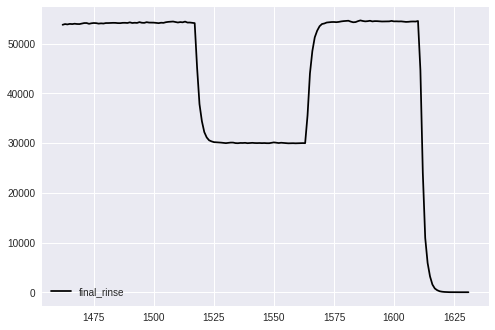

---------------------------------------------------
supply_pressure


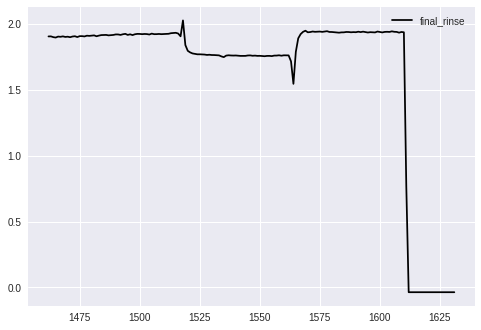

---------------------------------------------------
return_temperature


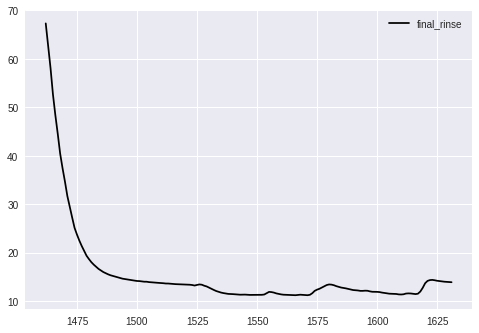

---------------------------------------------------
return_conductivity


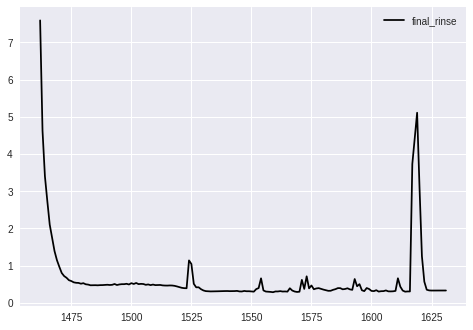

---------------------------------------------------
return_turbidity


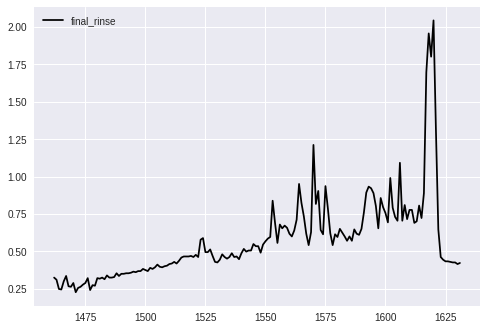

---------------------------------------------------
return_flow


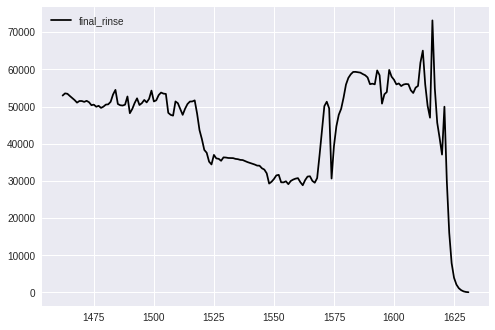

---------------------------------------------------
supply_pump


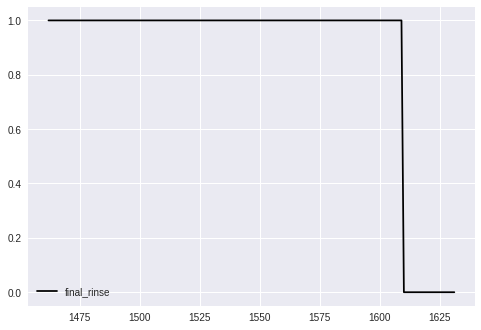

---------------------------------------------------
supply_pre_rinse


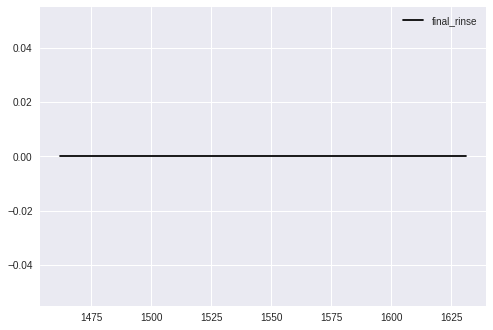

---------------------------------------------------
supply_caustic


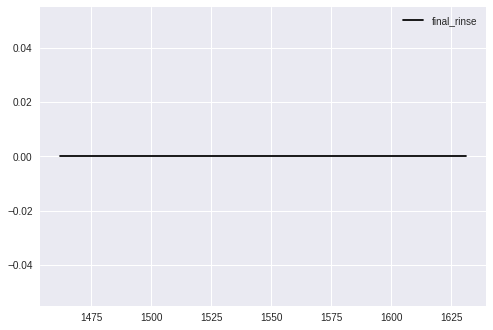

---------------------------------------------------
return_caustic


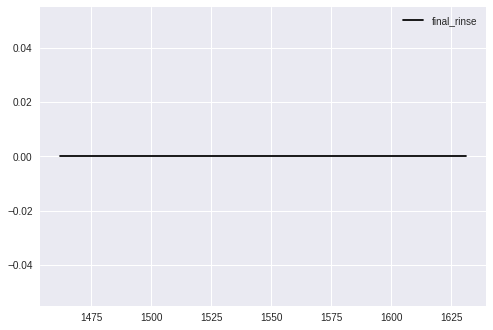

---------------------------------------------------
supply_acid


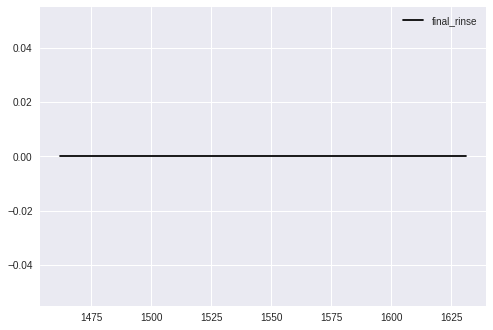

---------------------------------------------------
return_acid


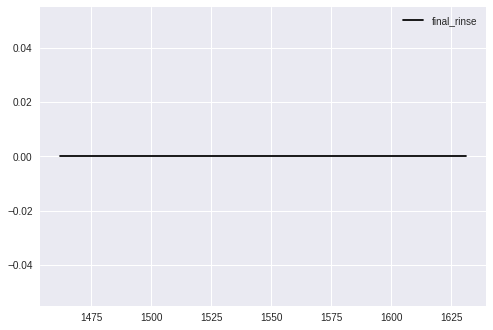

---------------------------------------------------
supply_clean_water


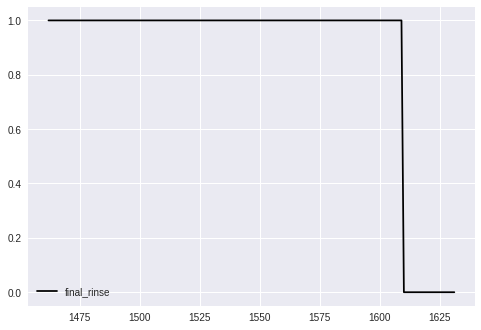

---------------------------------------------------
return_recovery_water


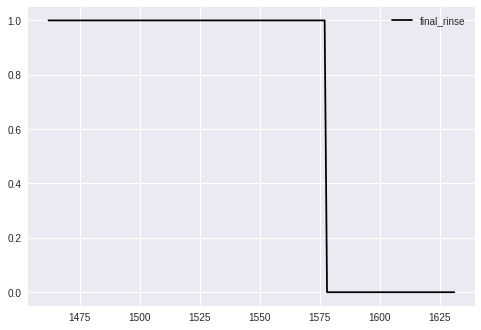

---------------------------------------------------
return_drain


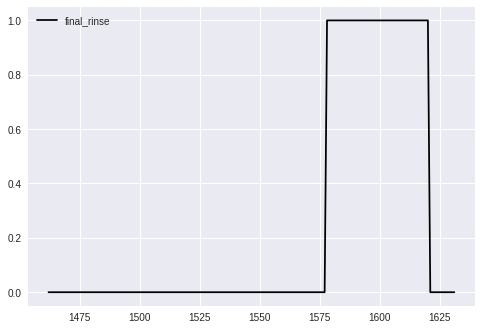

---------------------------------------------------
object_low_level


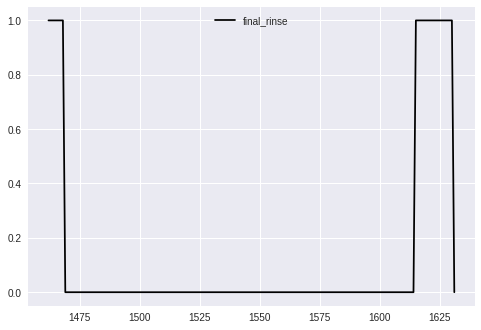

---------------------------------------------------
tank_level_pre_rinse


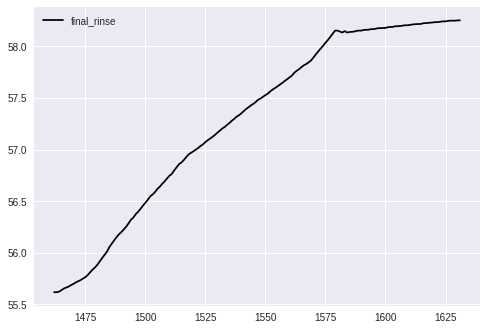

---------------------------------------------------
tank_level_caustic


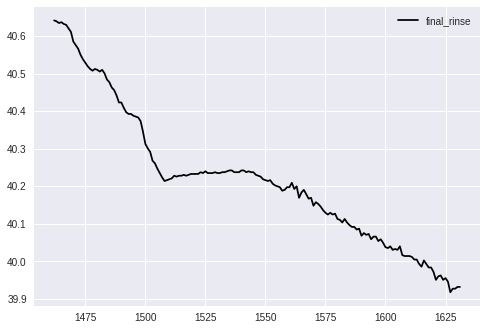

---------------------------------------------------
tank_level_acid


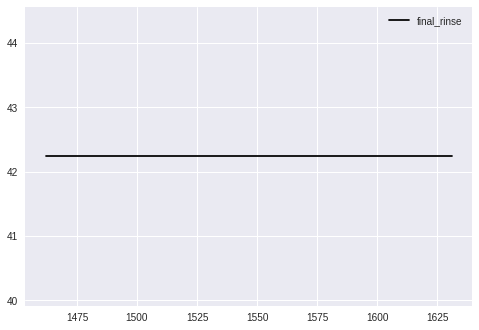

---------------------------------------------------
tank_level_clean_water


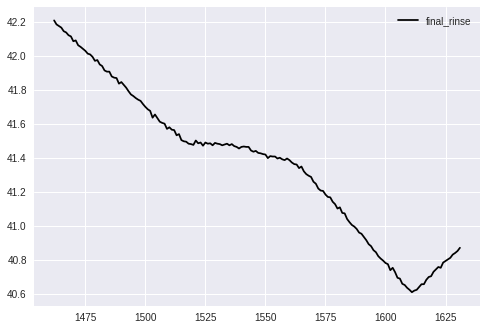

---------------------------------------------------
tank_temperature_pre_rinse


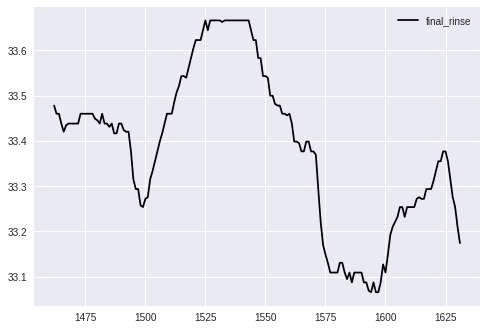

---------------------------------------------------
tank_temperature_caustic


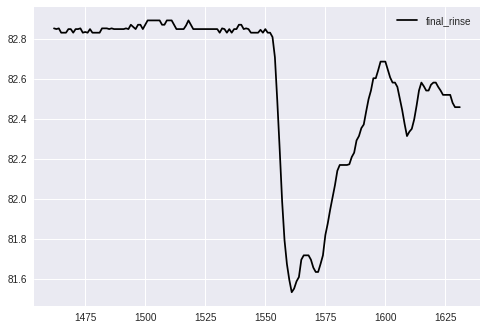

---------------------------------------------------
tank_temperature_acid


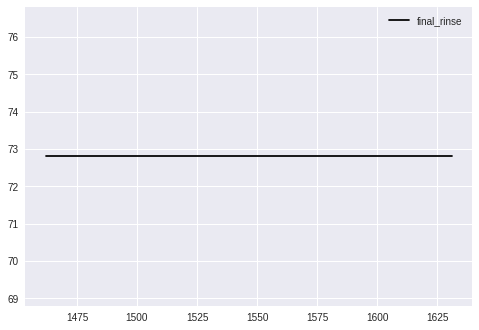

---------------------------------------------------
tank_concentration_caustic


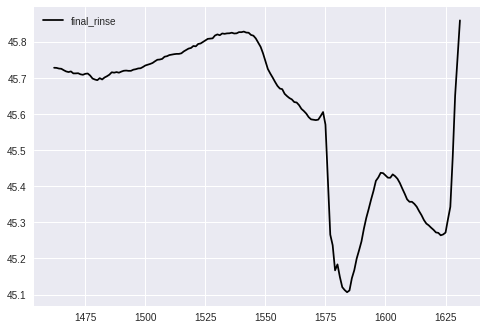

---------------------------------------------------
tank_concentration_acid


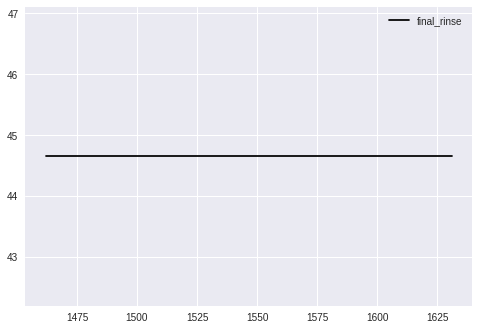

---------------------------------------------------
tank_lsh_caustic


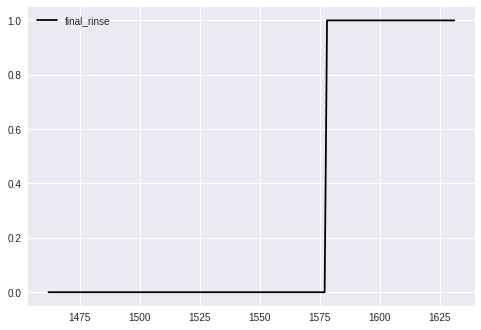

---------------------------------------------------
tank_lsh_acid


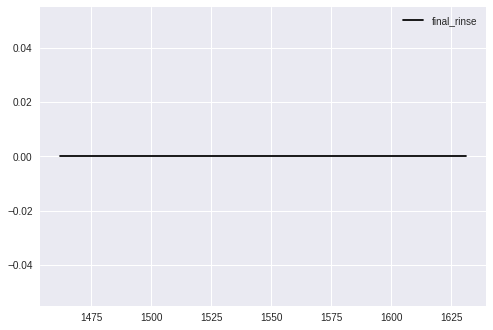

---------------------------------------------------
tank_lsh_clean_water


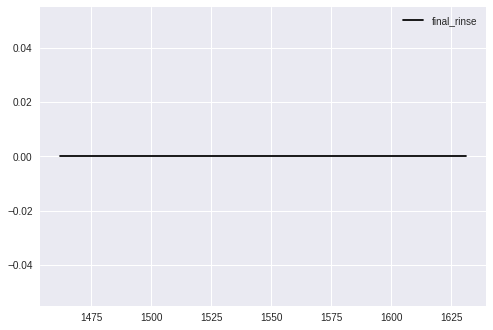

---------------------------------------------------
tank_lsh_pre_rinse


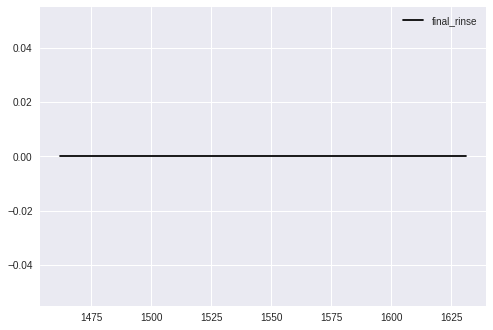

---------------------------------------------------
target_time_period


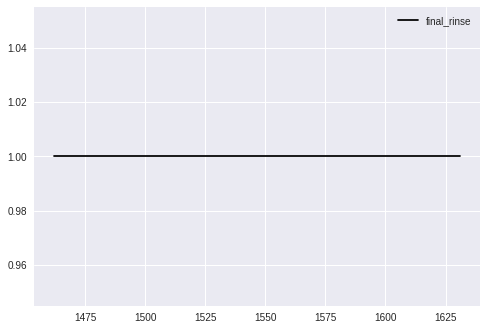

In [25]:
t = traindf[(traindf['process_id']==20001)&(traindf['target_time_period']==True)]
for c in feat:
    print("---------------------------------------------------")
    print(c)
    phases = ['pre_rinse', 'caustic', 'intermediate_rinse', 'acid', 'final_rinse']
    col = ['r','b','g','y','black']
    for i,p in enumerate(phases):
        try:
            start = t[t['phase']==p].index[0]
            end = t[t['phase']==p].index[-1]
            d = t.loc[start:end,c]
            plt.plot(d,color=col[i],label=p)
        except:
            pass
    plt.legend()
    plt.show()